<a href="https://colab.research.google.com/github/shlok-py/DeerHack2023-BroCode/blob/classification1/vggipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
#!kaggle datasets download -d antoreepjana/animals-detection-images-dataset

100% 8.92G/8.92G [03:50<00:00, 41.1MB/s]
100% 8.92G/8.92G [03:50<00:00, 41.5MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Animals.zip

Archive:  /content/drive/MyDrive/Animals.zip
  inflating: Animals-data-final-classes/Monkey/7a9d8c6f78af09ba.jpg  
  inflating: Animals-data-final-classes/Monkey/aa8d6caaed96d052.jpg  
  inflating: Animals-data-final-classes/Monkey/ace5ac6adedb17b0.jpg  
  inflating: Animals-data-final-classes/Monkey/7c09cab468a87350.jpg  
  inflating: Animals-data-final-classes/Monkey/7ac64a341e17afc6.jpg  
  inflating: Animals-data-final-classes/Monkey/68a3ff71f1c875d0.jpg  
  inflating: Animals-data-final-classes/Monkey/b01fb7776093ed8f.jpg  
  inflating: Animals-data-final-classes/Monkey/a203655099d51058.jpg  
  inflating: Animals-data-final-classes/Monkey/af9b778b0c5f4169.jpg  
  inflating: Animals-data-final-classes/Monkey/67fee5da5965d474.jpg  
  inflating: Animals-data-final-classes/Monkey/b7b24c60232661fc.jpg  
  inflating: Animals-data-final-classes/Monkey/aec207bfff20b4f8.jpg  
  inflating: Animals-data-final-classes/Monkey/a13762f6dfc2ca76.jpg  
  inflating: Animals-data-final-classes/Monke

In [ ]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_path = "/content/Animals-data-final-classes"
#val_path = "/content/test"

In [ ]:
train_data = ImageDataGenerator(
    rescale = 1./255
    #horizontal_flip= True
)
'''val_data = ImageDataGenerator(
    rescale = 1./255
)'''

'val_data = ImageDataGenerator(\n    rescale = 1./255\n)'

In [ ]:
train_generator = train_data.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = "categorical",
                                                 classes = ["elephant","Cheetah","Monkey","bear","deer","Hippopotamus","rhinoceros",'tiger']
                                                 )
'''val_generator = val_data.flow_from_directory(val_path,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical",
                                            classes = ["Elephant","Cheetah","Monkey","Bear","Deer"]
                                            )'''

Found 824 images belonging to 8 classes.


'val_generator = val_data.flow_from_directory(val_path,\n                                            target_size = (224,224),\n                                            batch_size = 32,\n                                            class_mode = "categorical",\n                                            classes = ["Elephant","Cheetah","Monkey","Bear","Deer"]\n                                            )'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

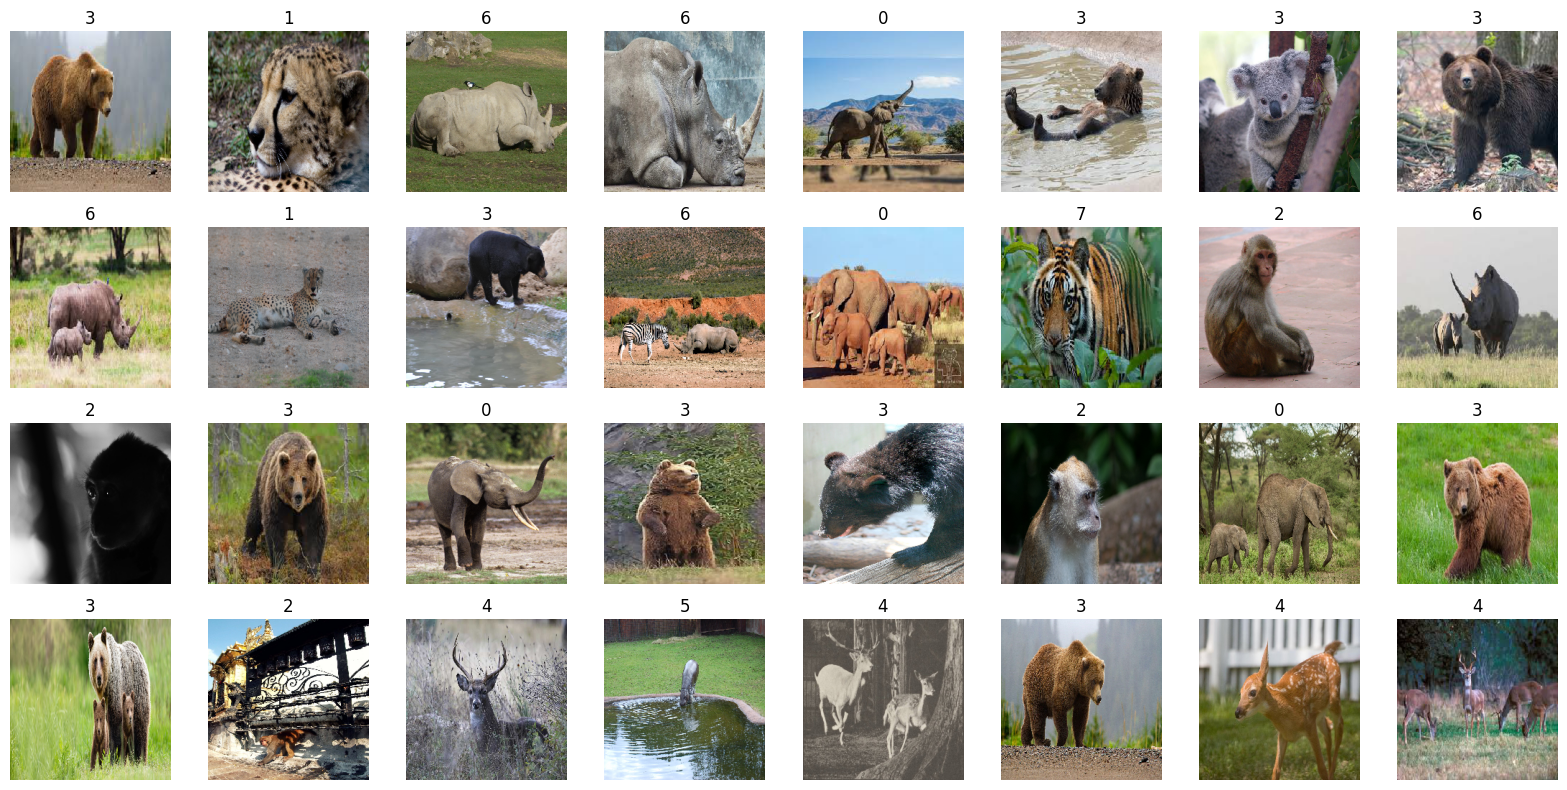

In [ ]:
batch_images, batch_labels = train_generator.next()

fig, axs = plt.subplots(4, 8, figsize=(16, 8))
axs = axs.ravel()

for i in range(batch_images.shape[0]):
    axs[i].imshow(batch_images[i])
    axs[i].axis('off')
    axs[i].set_title(np.argmax(batch_labels[i]))

plt.tight_layout()
plt.show()

In [ ]:
from keras.applications import VGG16

In [ ]:
resnet = VGG16(include_top=True, weights='imagenet', input_shape=(224, 224, 3))

for layer in resnet.layers:
    layer.trainable = False

#x = tf.keras.layers.GlobalAveragePooling2D()(resnet.output)
x = tf.keras.layers.Dense(256, activation='relu')(resnet.output)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(8, activation='softmax')(x)

model = tf.keras.models.Model(inputs=resnet.input, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

553467096/553467096 [==============================] - 3s 0us/step


In [ ]:
'''base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
for layer in base_model.layers:
  layer.trainable = False'''

"base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (32,32,3))\nfor layer in base_model.layers:\n  layer.trainable = False"

In [ ]:
'''x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)'''

"x = layers.Flatten()(base_model.output)\nx = layers.Dense(1000, activation='relu')(x)\npredictions = layers.Dense(10, activation = 'softmax')(x)"

In [ ]:
#head_model = Model(inputs = base_model.input, outputs = predictions)
#head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
'''resnet = ResNet50(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

output_layer = tf.keras.layers.Dense(13, activation='softmax', name='predictions')(resnet.layers[-2].output)

model = tf.keras.models.Model(inputs=resnet.input, outputs=output_layer)

for layer in model.layers[:-1]:
    layer.trainable = False


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])'''

"resnet = ResNet50(weights='imagenet', include_top=True, input_shape=(224, 224, 3))\n\noutput_layer = tf.keras.layers.Dense(13, activation='softmax', name='predictions')(resnet.layers[-2].output)\n\nmodel = tf.keras.models.Model(inputs=resnet.input, outputs=output_layer)\n\nfor layer in model.layers[:-1]:\n    layer.trainable = False\n\n\nmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),\n              loss='categorical_crossentropy',\n              metrics=['accuracy'])"

In [ ]:
'''model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])'''

"model = tf.keras.Sequential([\n    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),\n    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),\n    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),\n    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),\n    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(512, activation='relu'),\n    tf.keras.layers.Dense(256, activation='relu'),\n    tf.keras.layers.Dense(5, activation='softmax')\n])"

In [ ]:
'''model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])'''

history = model.fit(train_generator,
                    epochs=50
                    )

Epoch 1/50
26/26 [==============================] - 30s 603ms/step - loss: 2.0662 - accuracy: 0.1917
Epoch 2/50
26/26 [==============================] - 14s 527ms/step - loss: 2.0257 - accuracy: 0.1954
Epoch 3/50
26/26 [==============================] - 14s 514ms/step - loss: 1.9779 - accuracy: 0.2354
Epoch 4/50
26/26 [==============================] - 14s 526ms/step - loss: 1.9197 - accuracy: 0.2621
Epoch 5/50
26/26 [==============================] - 14s 529ms/step - loss: 1.8736 - accuracy: 0.3095
Epoch 6/50
26/26 [==============================] - 14s 528ms/step - loss: 1.8326 - accuracy: 0.3107
Epoch 7/50
26/26 [==============================] - 14s 526ms/step - loss: 1.7925 - accuracy: 0.3337
Epoch 8/50
26/26 [==============================] - 14s 531ms/step - loss: 1.7313 - accuracy: 0.3653
Epoch 9/50
26/26 [==============================] - 14s 529ms/step - loss: 1.6822 - accuracy: 0.3896
Epoch 10/50
26/26 [==============================] - 14s 535ms/step - loss: 1.6600 - accura

In [ ]:
model.save('my_model.h5')